# In this notebook,we have used basic ML models to predict the result. 

#### Using,Linear regression model to predict offered salary on other variables

In [1]:
#necessary modeule

%load_ext autoreload
%autoreload 2

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#reading csv file

data=pd.read_csv('/Users/bibekrai/tensorflow-test/MeroJob-Analysis/mergeddata.csv')
data.head()

,Unnamed: 0,Title,Company,Location,KeySkills,job_category,job_level,no_of_vacancy,employment_type,offered_salary,education_level,experience_required
0,0,Backend Developer,Codeware Lab,"Dharmasthal Marg, Kathmandu 44600, Nepal","['Communication', 'Teamwork', 'Java', 'Analyti...",IT & Telecommunication\n > Programmer/ Softwar...,Mid Level,[ 25 ],Full Time,"NRs. 200,000.00 - 500,000.00 Monthly",Bachelor,More than or equals to 3 years
1,1,Asp. Net Developer,Exotrac,Old Baneshwor,"['Html', 'Css', 'Javascript']",IT & Telecommunication\n > Database Engineer/D...,Senior Level,[ 10 ],Full Time,"$. 1,000.00 - 1,500.00 Monthly",Bachelor,More than or equals to 3 years
2,2,Linux Ninja Wanted ( Excellent …,Tech Central,"Kathmandu, Nepal","['Communication', 'Problem Solving', 'Linux', ...",IT & Telecommunication,Mid Level,[ 10 ],Full Time,Negotiable,Bachelor,More than or equals to 5 years
3,3,Senior Laravel Web Developer,SabKura.com,"New Baneshwor, Kathmandu, Nepal","['Php', 'Html', 'Css', 'Javascript', 'Vue Js']","IT & Telecommunication\n > Content Developer, ...",Mid Level,[ 5 ],Full Time,"NRs. 80,000.00 - 160,000.00 Monthly",Bachelor,More than or equals to 4 years
4,4,Senior Software Engineer (Pytho…,Logpoint Nepal,"Jawalakhel ,Lalitpur","['Teamwork', 'Problem Solving', 'Analytical Sk...",IT & Telecommunication,Senior Level,[ 5 ],Full Time,Negotiable,Bachelor,More than or equals to 5 years


In [4]:
#replacing column value

data['no_of_vacancy']=data['no_of_vacancy'].str.replace('[','').str.replace(']','').astype(int)

/var/folders/l2/fqpyq8qx1xs_0rm0kph9rxl40000gn/T/ipykernel_1867/3980346858.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['no_of_vacancy']=data['no_of_vacancy'].str.replace('[','').str.replace(']','').astype(int)


In [5]:
#changing column value into numeric for linear regression prediction


data['offered_salary']=data['offered_salary'].replace({'Negotiable':1,'NRs. 200,000.00 - 500,000.00 Monthly': 350000,'$. 1,000.00 - 1,500.00 Monthly':1250,'NRs. 80,000.00 - 160,000.00 Monthly':120000,'NRs. 20,000.00 - 35,000.00 Monthly':27000,'NRs. 100,000.00 - 170,000.00 Monthly':130000,'NRs. 40,000.00 - 80,000.00 Monthly':60000,'NRs. 10,000.00 Monthly':5000,'NRs. 30,000.00 - 80,000.00 Monthly':55000,'$. 300.00 - 500.00 Monthly':400,'NRs. 80,000.00 - 100,000.00 Monthly':90000,'NRs. 16,000.00 - 21,000.00 Monthly':18000,'NRs. 25,000.00 Monthly':12000})

In [6]:
#writing the updated file to new csv

data.to_csv('new.csv', index=False)

In [7]:
#reading new csv

pd.read_csv('new.csv')

,Unnamed: 0,Title,Company,Location,KeySkills,job_category,job_level,no_of_vacancy,employment_type,offered_salary,education_level,experience_required
0,0,Backend Developer,Codeware Lab,"Dharmasthal Marg, Kathmandu 44600, Nepal","['Communication', 'Teamwork', 'Java', 'Analyti...",IT & Telecommunication\n > Programmer/ Softwar...,Mid Level,25,Full Time,350000,Bachelor,More than or equals to 3 years
1,1,Asp. Net Developer,Exotrac,Old Baneshwor,"['Html', 'Css', 'Javascript']",IT & Telecommunication\n > Database Engineer/D...,Senior Level,10,Full Time,1250,Bachelor,More than or equals to 3 years
2,2,Linux Ninja Wanted ( Excellent …,Tech Central,"Kathmandu, Nepal","['Communication', 'Problem Solving', 'Linux', ...",IT & Telecommunication,Mid Level,10,Full Time,1,Bachelor,More than or equals to 5 years
3,3,Senior Laravel Web Developer,SabKura.com,"New Baneshwor, Kathmandu, Nepal","['Php', 'Html', 'Css', 'Javascript', 'Vue Js']","IT & Telecommunication\n > Content Developer, ...",Mid Level,5,Full Time,120000,Bachelor,More than or equals to 4 years
4,4,Senior Software Engineer (Pytho…,Logpoint Nepal,"Jawalakhel ,Lalitpur","['Teamwork', 'Problem Solving', 'Analytical Sk...",IT & Telecommunication,Senior Level,5,Full Time,1,Bachelor,More than or equals to 5 years
5,5,SEO Expert,Discovery World Trekking,Kathmandu,"['Javascript', 'React', 'Blogging', 'Search En...",IT & Telecommunication,Mid Level,1,Full Time,27000,Bachelor,More than or equals to 2 years
6,6,Senior Backend Developer,Hamro Academy,New Baneshwor,"['Html', 'Css', 'Javascript', 'Mongodb', 'Node...",IT & Telecommunication\n > Programmer/ Softwar...,Senior Level,1,Full Time,1,Bachelor,More than or equals to 3 years
7,7,Senior Laravel Developer,Resimator (Oy),Mahakavi Marg 29 Dillibazar,"['Php', 'Javascript', 'Mysql', 'Ajax', 'Larave...",IT & Telecommunication\n > Programmer/ Softwar...,Senior Level,2,Full Time,1,Bachelor,More than or equals to 3 years
8,8,Jr. IT Associate,Daraz,"Kathmandu, Nepal",[],IT & Telecommunication,Mid Level,1,Full Time,1,Bachelor,More than or equals to 1 year
9,9,Customer Care Trainee,UBA Solutions,"Imadol, Lalitpur, Nepal","['Problem Solving', 'Css', 'Html5', 'Adobe Pho...",IT & Telecommunication,Entry Level,5,Traineeship,1,Bachelor,Less than 1 year


### Here , in salary offered column , the values like 1 is negotiable and other values are averaged salary.

In [8]:
data.dtypes

Unnamed: 0              int64
Title                  object
Company                object
Location               object
KeySkills              object
job_category           object
job_level              object
no_of_vacancy           int64
employment_type        object
offered_salary          int64
education_level        object
experience_required    object
dtype: object

In [9]:
new_data=pd.read_csv('new.csv')

In [10]:
#declaring variable

x=new_data['no_of_vacancy'].values.reshape(-1,1)
y=new_data['offered_salary'].values.reshape(-1,1)

In [11]:
#splitting data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [12]:
#training and fitting the model

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
#predicting the model

y_pred=reg.predict(X_test)

In [14]:
#predicting the average salary where job vacancy is only 1

reg.predict([[1]])

array([[7100.03969393]])

In [15]:
#predicting the average salary where job vancacy is 5

reg.predict([[5]])

array([[5615.75848876]])

**Observation : The more the vacancy of certain job the less is salary is . Using, linear regression model we found this.**

# Finding similar job postings using K means Clustering.

In [16]:
#importing necessary libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [17]:
#reading the dataset

new_data=pd.read_csv('/Users/bibekrai/tensorflow-test/MeroJob-Analysis/updated.csv')

In [18]:
#encoding categorical value using labelencoder

le=LabelEncoder()
new_data['KeySkills']=le.fit_transform(new_data['KeySkills'])
new_data['job_category']=le.fit_transform(new_data['job_category'])

In [21]:
#using standardscaler

sd=StandardScaler()
x=sd.fit_transform(new_data[['KeySkills','job_category']])

In [64]:
#K means clustering 

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)

/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [65]:
#predicting keyskills and job_category

y_predict=kmeans.fit_predict(x)

/Users/bibekrai/tensorflow-test/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
cols=['KeySkills','job_category']

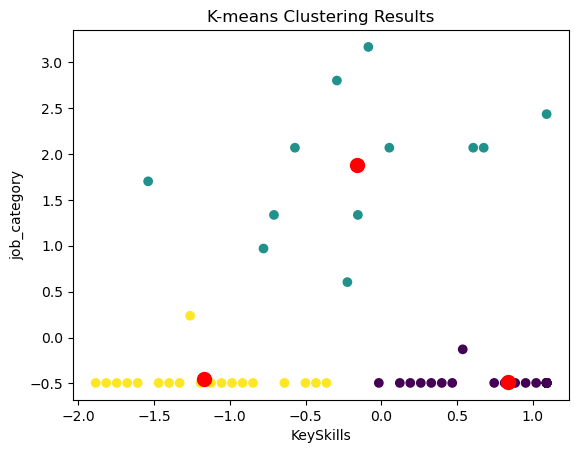

In [67]:
#vizualizing the clusters

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x[:, 0], x[:, 1], c=y_predict)
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title('K-means Clustering Results')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroid') 
plt.show()

In [68]:
#Centres of every job_category

print(kmeans.cluster_centers_)

[[ 0.83370637 -0.48161818]
 [-0.16038324  1.88544366]
 [-1.17120453 -0.45570509]]


**From above plot, we put k=3 for only top 3 job category . The yellow cluster is "IT & Telecommunication" category , 
grey cluster is "Programmer/ Software Engineer, Test Engineer" category  whereas green cluster is " IT System Management, Network Engineer" category**